<a href="https://colab.research.google.com/github/Jay0073/Week-1/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Waste Management using CNN

## Downloading Dataset

In [ ]:
# installing kaggle and uploading kaggle api
!pip install -q kaggle
from google.colab import files
files.upload()

In [2]:
# creating kaggle directory and changing permisions of that directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# downloading the dataset
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 98% 420M/427M [00:08<00:00, 78.9MB/s]
100% 427M/427M [00:08<00:00, 55.1MB/s]


In [ ]:
# unzipping the contents of the dataset
!unzip /content/waste-classification-data.zip

In [5]:
!rm -r waste-classification-data.zip
!rm -r dataset

## Installing Libraries

In [ ]:
# installing ml libraries
!pip install tensorflow
!pip install opencv-python

In [23]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import random

In [9]:
# importing ml libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.utils import plot_model
from keras.preprocessing.image import img_to_array, load_img
# from keras.proprecessing.image import ImageDataGenerator # this is not working
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from glob import glob

In [13]:
# defining traing and test datasets paths
train_path = '/content/DATASET/TRAIN'
test_path = '/content/DATASET/TEST'

## Data Exploration

### Dataframe Preparation

In [19]:
x_data = []
y_data = []

widths = []
heights = []

for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_arr = cv2.imread(file)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        h, w = img_arr.shape[:2]
        widths.append(w)
        heights.append(h)
        x_data.append(img_arr)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [00:15<00:00, 643.57it/s]


In [15]:
data.shape

(22564, 2)

### Random images visualization

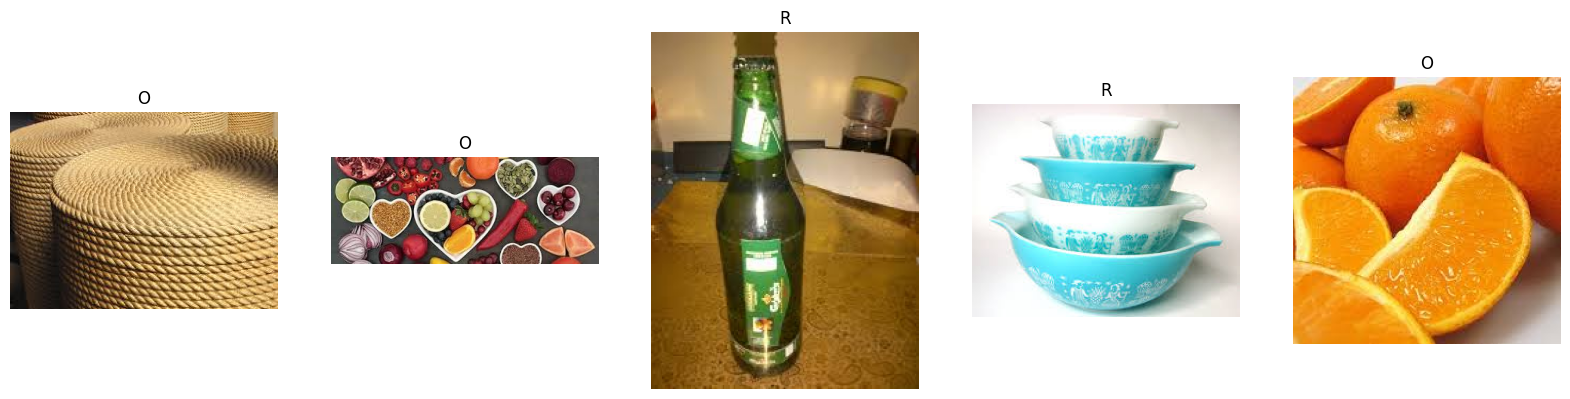

In [30]:
indices = random.sample(range(data.shape[0]), 5)

plt.figure(figsize=(20, 4 * 5))  # Adjust figure size as needed
for i, index in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_data[index])
    plt.title(y_data[index])
    plt.axis('off')
plt.show()

###Class Distribution

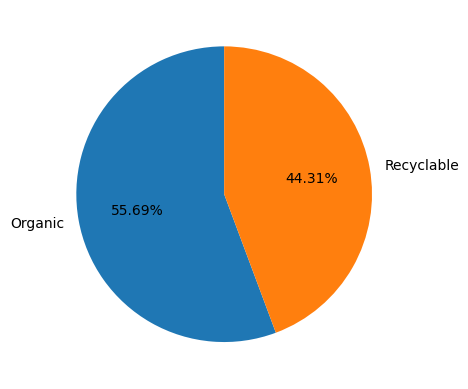

In [16]:
plt.pie(data['label'].value_counts(), labels=["Organic", "Recyclable"], autopct='%1.2f%%', startangle=90)
plt.show()

###Analysing Image sizes

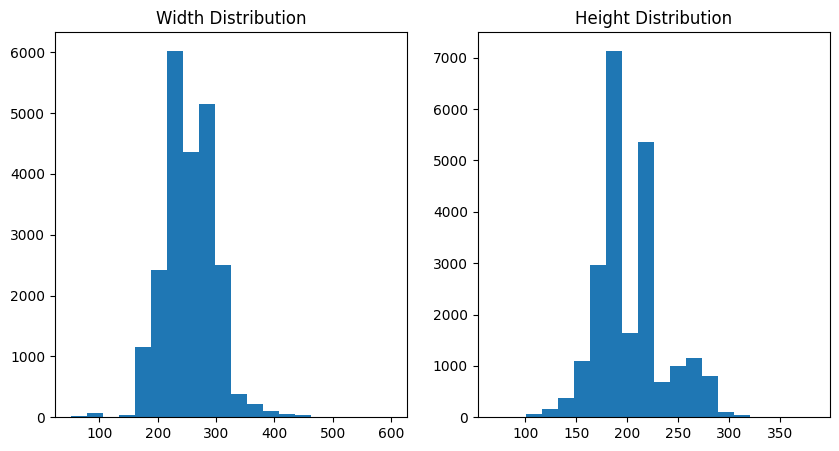

Mean Width: 252.31687644034744, Mean Height: 203.74711930508775


In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20)
plt.title('Width Distribution')
plt.subplot(1, 2, 2)
plt.hist(heights, bins=20)
plt.title('Height Distribution')
plt.show()

print(f"Mean Width: {np.mean(widths)}, Mean Height: {np.mean(heights)}")

##Data Preprocessing

### Data Augmentation and Resizing

In [ ]:
# dimensions for resizing
img_width = 224
img_height = 224

# batch size for generating augmented data
batch_size = 32

In [33]:
# data generator to apply augmentation
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)

In [34]:
# generates batch of images from directory and apply
# - Augmentation
# - Resize
# - Convert images and labels to numpy arrays
# - Label encoding

train_data_generator = data_generator.flow_from_directory(
    train_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training',
    seed=42
)

validation_data_generator = data_generator.flow_from_directory(
    train_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation',
    seed=42
)

test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(
    test_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle=False
)

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
